In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

from generate import *

In [4]:
model = torch.load('all.txt.model')

FileNotFoundError: [Errno 2] No such file or directory: 'linux.txt.model'

In [ ]:
def wrap_rnn_output(text, hiddens, W=20):
    ''' Wrap text with hidden units to certain width '''
    new_text, new_hiddens = [], []
    for char, hidden in zip(text, hiddens):
        new_text.append(char)
        new_hiddens.append(hidden)
        if char == '\n':
            for i in range(W - len(new_text) % W):
                new_text.append(' ')
                new_hiddens.append(np.zeros_like(hiddens[0]))
    for i in range(W - len(new_text) % W):
        new_text.append(' ')
        new_hiddens.append(np.zeros_like(hiddens[0]))
    
    return np.array(new_text), np.array(new_hiddens)

In [28]:
def plot_rnn_output(text, hiddens, W, zoom=1.0, cols=4, save_file=None):
    ''' Plot wrapped rnn output with each color representing the activation 
        of a certain node in the hidden representation '''

    N = hiddens.shape[-1]
    rows = math.ceil(N/cols)
    
    plt.figure(figsize=(cols*zoom*W/5, rows*zoom*len(text)/W/3))
    plt.subplots_adjust(wspace = 0.01, hspace = .01)
    for i in range(N):
        plt.subplot(rows, cols, i+1)
        heat = hiddens[:, -1, 0, i]
        sns.heatmap(heat.reshape(-1, W), annot=text.reshape(-1, W), fmt='s',
                    cbar=False, cmap='coolwarm')
        plt.xticks([])
        plt.yticks([])
        plt.title('Node {}'.format(i))
    if save_file:
        plt.savefig(save_file)
    plt.show()

In [29]:
prime_str = '\n\n'
text, hiddens = generate(model, prime_str, 2002, 0.8, True)
text = text[2:]
hiddens = hiddens[2:]
print(text)

/ ti1n)iWDf_ITAioq r_eceeg_
	c    c0_dEMK_X6_RF1oDereefiuin
    tmisetefn     ii              pe    rx;t
	 	               3  t34__0x07b0000,    L a,i  x2lS_FFF_d o / te  k0p
	bd->sD  0CEC _1ELp: */te, ~ e IteedRMT;
	RA _mbf
i#,adI_D_s_icRA_m*Dr_AC_SBCYu	r o dA_Me_p s_or        " p 
A_L	(P_Ice tA1,Ge(DtDG_PE	UOELa__CPDRSEA__M_   
 ithe edeco   ppa0x_ast,p *  	cSe  =s o/*Dv_CE_ect de*e,nopurdt i   
IN__nn,t    000,
i()detsadcrerp;r"_L		usttx.h.(

	ro/r 

)  
	 c_ze
	e a 	vs	s tarla,wedriusut cuald miskredlurie
{ sitttcanst   aueesftfitcpmna_ e%ie>v D  rougfse' eccrka(a_l);e
 ca =rasoigdtem
snm te waoseo_rrst_poutr; stsinr   U Liongmo_ld  	_x  p\a at
 
	
#   n,ieP	c_p   	0x0000000000240000000002,D_oeco_cEsP  
}*	/
	ft- ef,sa _f ddp_De= P)31__P
Pxserpomi =
		o	
# ce	 it e s T _   a 	  fr xt,clo f8     d   _H_ANT__*A,lR_Ae	rR_2d4BRETE_SRW
	SHd4(
#d  c          arodiiiieou-   {th)drevrinl  & he
		00mmipprendi-mmPAHR_0E_s_NU {_
	pln_d_ie kef)ol cicc,immrefb_nFF_A
ano00EoRn_OC_
	Hrllt_ecin  s

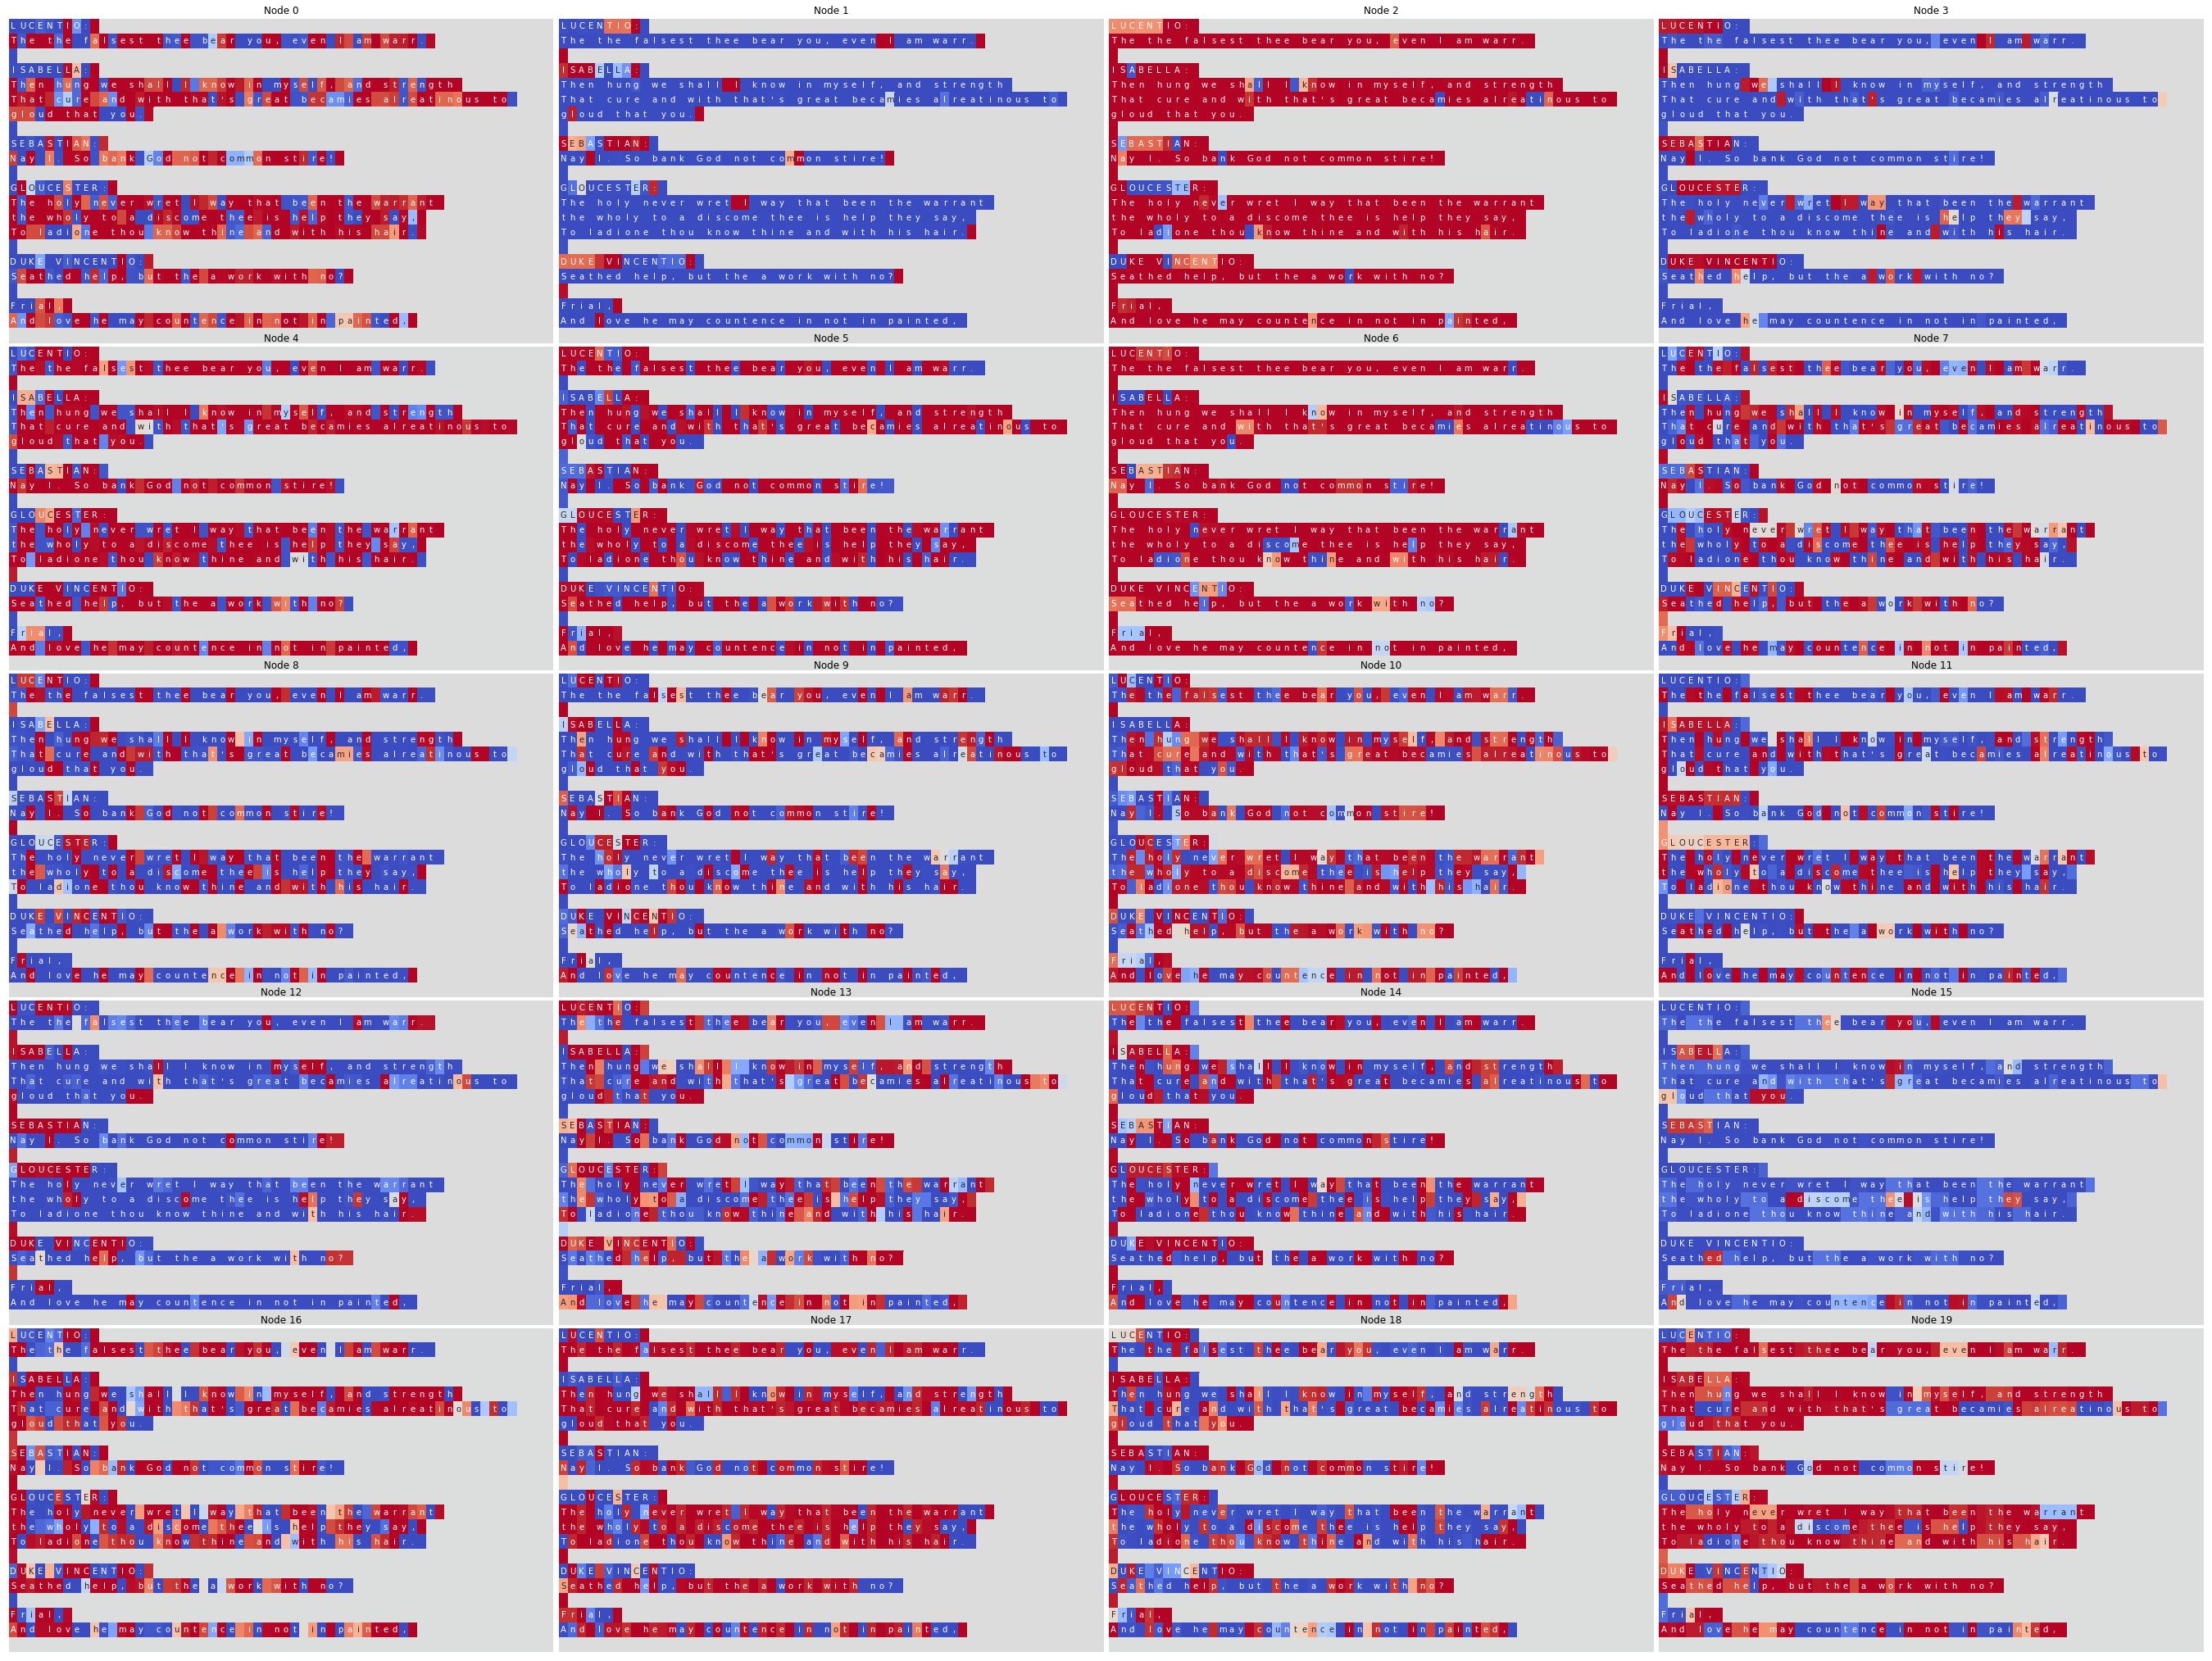

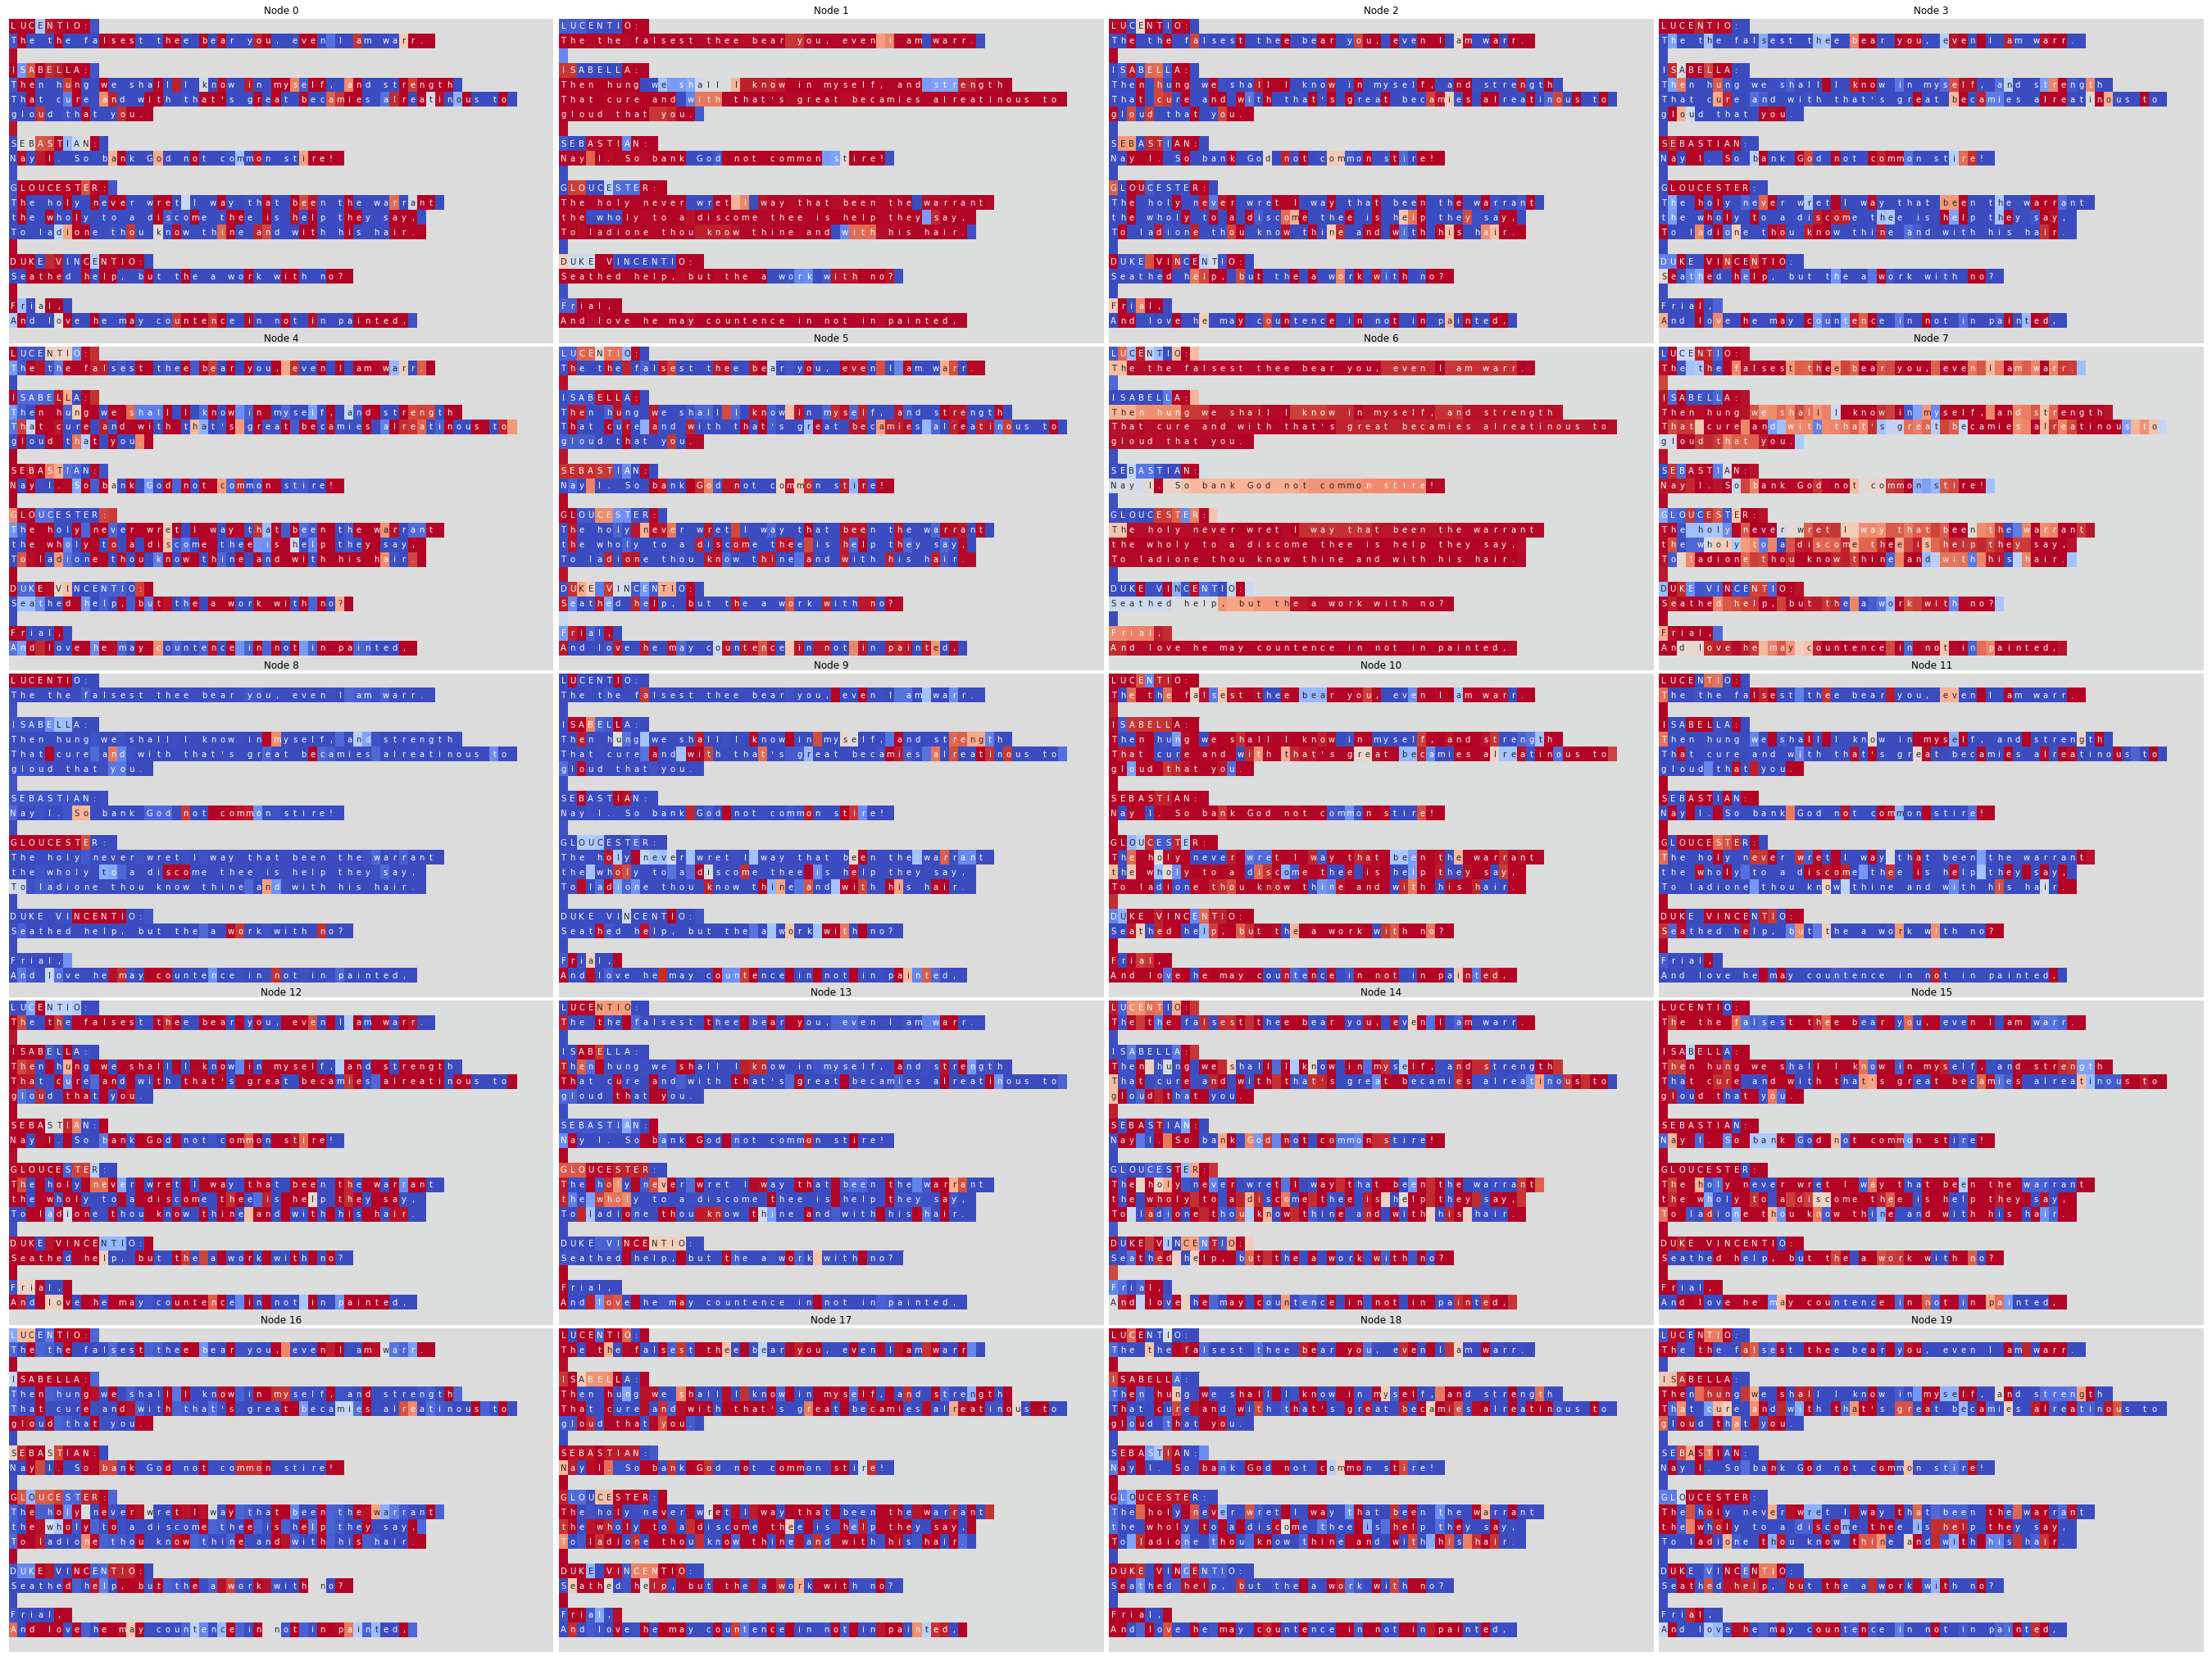

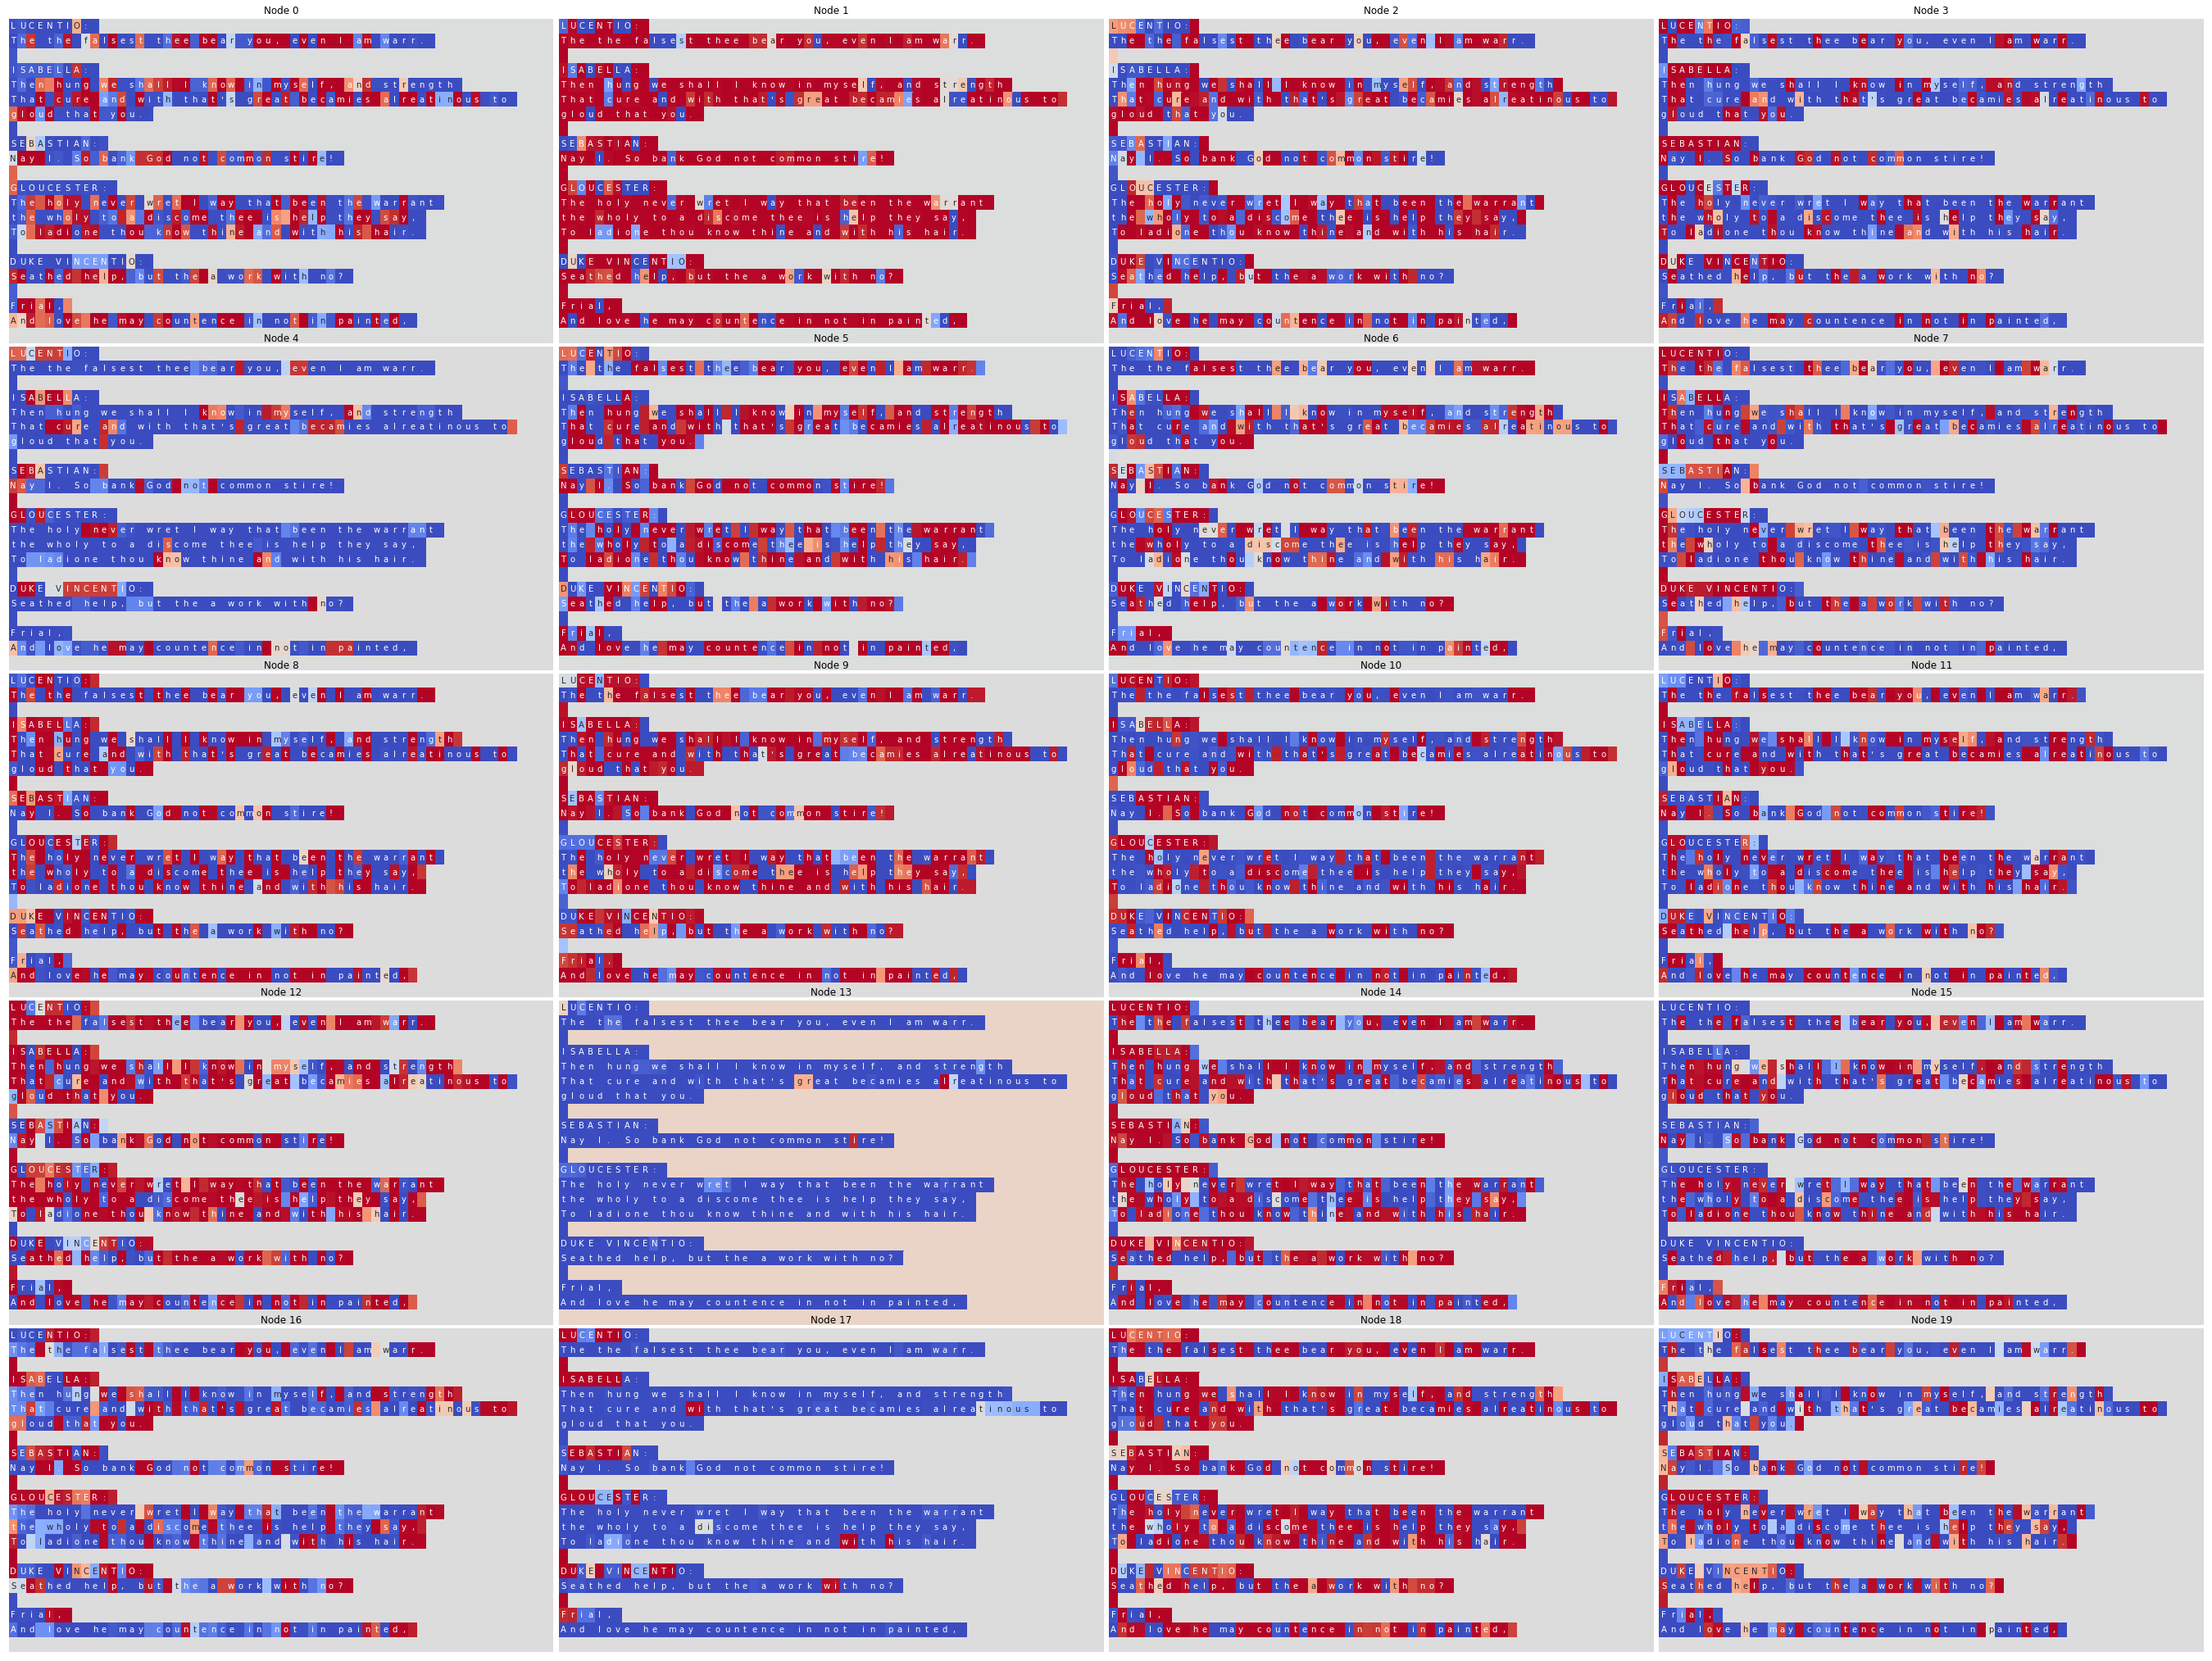

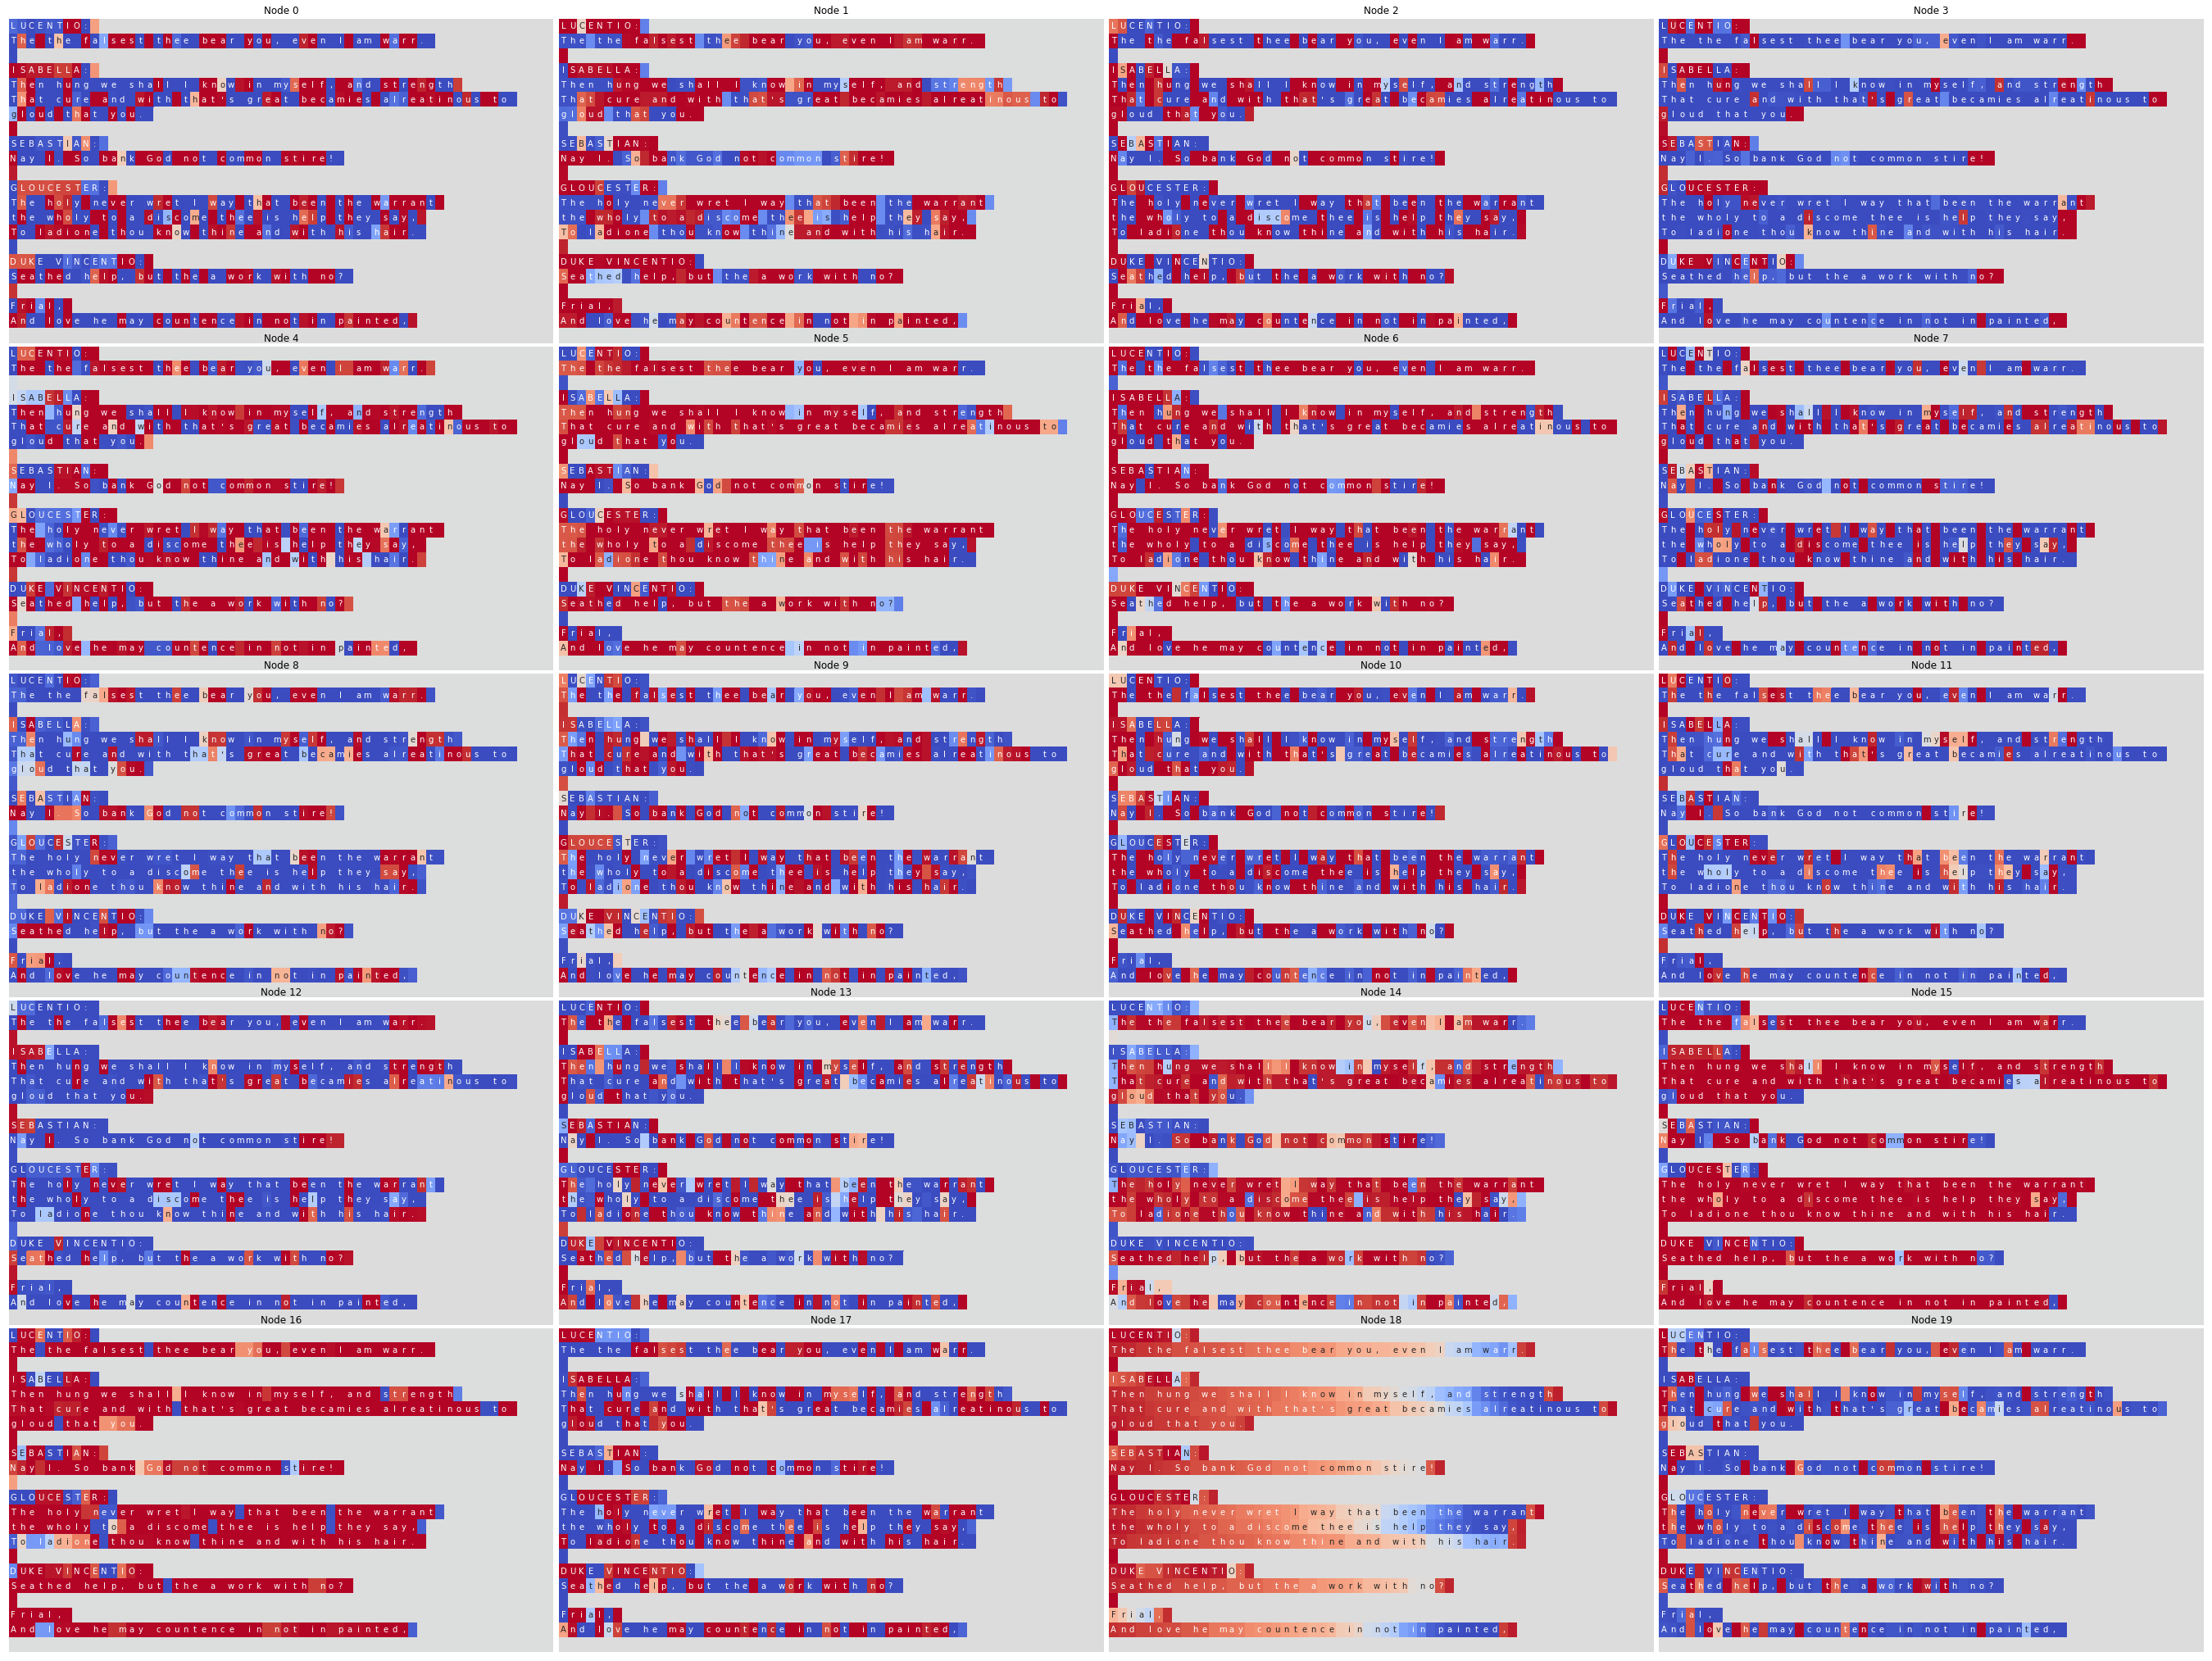

In [ ]:
W = 60
wrapped_text, wrapped_hiddens = wrap_rnn_output(text, hiddens, W=W)

plot_rnn_output(wrapped_text, wrapped_hiddens[:,:,:,:20], W=W, zoom=1.0, save_file='neurons-0-20.png')
plot_rnn_output(wrapped_text, wrapped_hiddens[:,:,:,20:40], W=W, zoom=1.0, save_file='neurons-20-40.png')
plot_rnn_output(wrapped_text, wrapped_hiddens[:,:,:,40:60], W=W, zoom=1.0, save_file='neurons-40-60.png')
plot_rnn_output(wrapped_text, wrapped_hiddens[:,:,:,60:80], W=W, zoom=1.0, save_file='neurons-60-80.png')
plot_rnn_output(wrapped_text, wrapped_hiddens[:,:,:,80:100], W=W, zoom=1.0, save_file='neurons-80-100.png')